In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Преобразование Бокса-Кокса

Если случайная величина имеет логнормальное распределение, то ее логарифм имеет нормальное распределение.

In [82]:
data_log = pd.Series(np.random.lognormal(0, 1, 1000))

<AxesSubplot:>

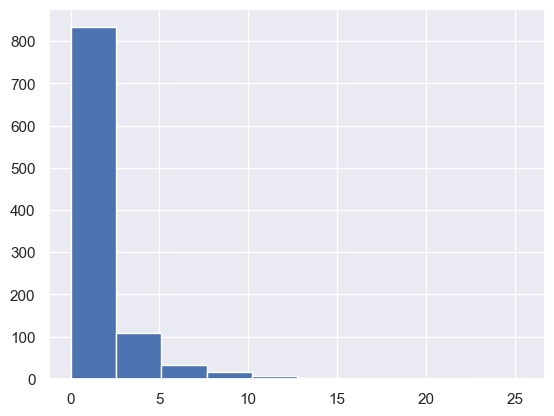

In [83]:
data_log.hist()

<AxesSubplot:>

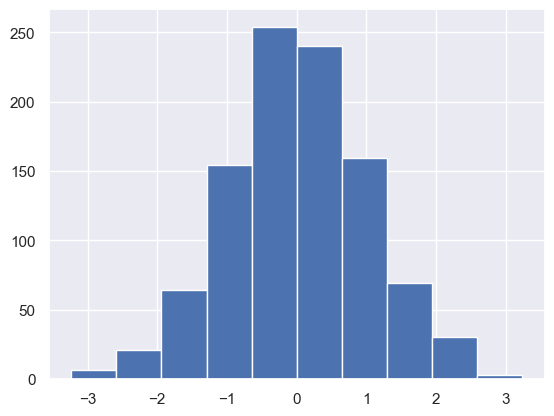

In [84]:
np.log(data_log).hist()

Почему это работает?

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


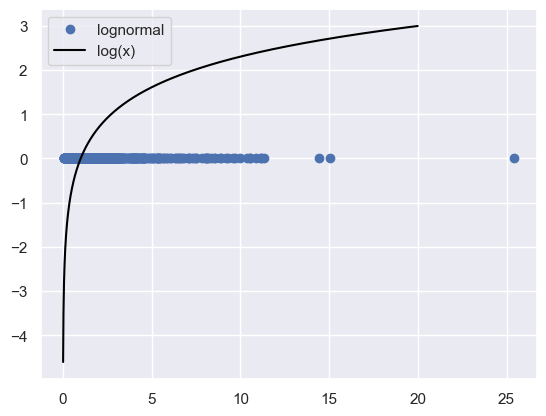

In [85]:
log_x = np.arange(0.01, 20, 0.01)
log_y = np.log(log_x)

x_points = data_log
y_points = np.zeros(1000)

fig = plt.figure()
plt.plot(x_points, y_points, 'o', label="lognormal")
plt.plot(log_x, log_y, 'black', label='log(x)')

plt.legend()

fig.show()

Если экспоненциальное распределение?

In [86]:
data_exp = pd.Series(np.random.exponential(size=1000))

<AxesSubplot:>

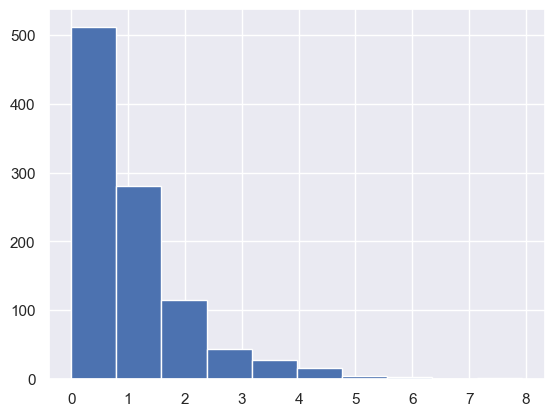

In [87]:
data_exp.hist()

In [89]:
np.log(data).hist()

NameError: name 'data' is not defined

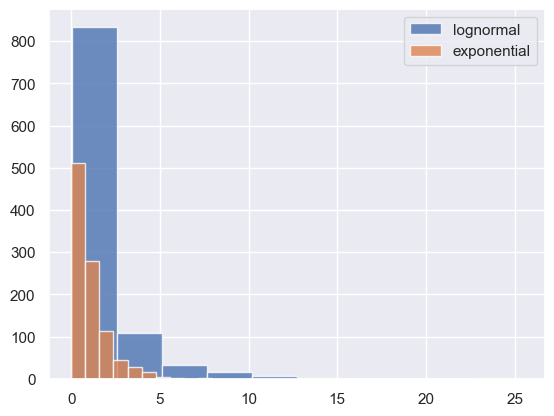

In [90]:
plt.hist(data_log, label='lognormal', alpha=.8)
plt.hist(data_exp, label='exponential', alpha=.8)
plt.legend()

plt.show()

Найдем такое преобразование.

$$\int\frac{1}{x^{1-\lambda}}=\frac{x^\lambda-1}{\lambda}+C,$$
где $\lambda$ - искомый параметр.

$$x^*_i=\begin{cases}
\ln(x), & \lambda=0 \\
\frac{x^\lambda-1}{\lambda}, & \text{в обратном случае.}
\end{cases}$$

In [91]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data_exp)

<AxesSubplot:>

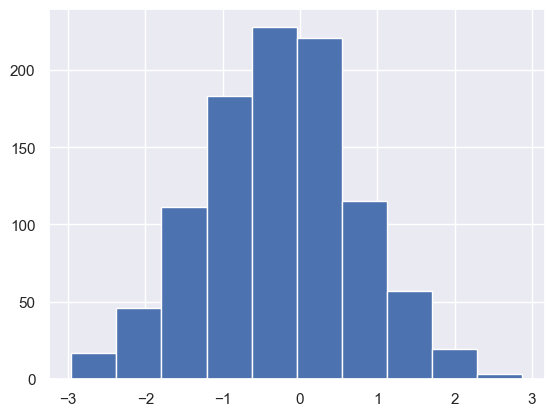

In [92]:
pd.Series(transformed_data).hist()

In [93]:
best_lambda

0.30108749915174066

# Отбор признаков

In [94]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]


In [95]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [96]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [97]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<AxesSubplot:xlabel='engine-type', ylabel='Count'>

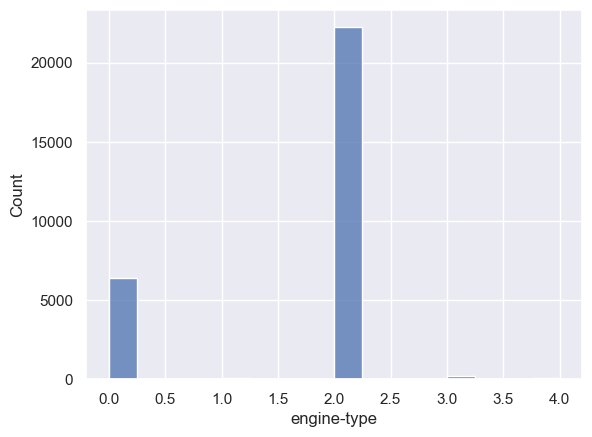

In [98]:
sns.histplot(data=train_X, x='engine-type')

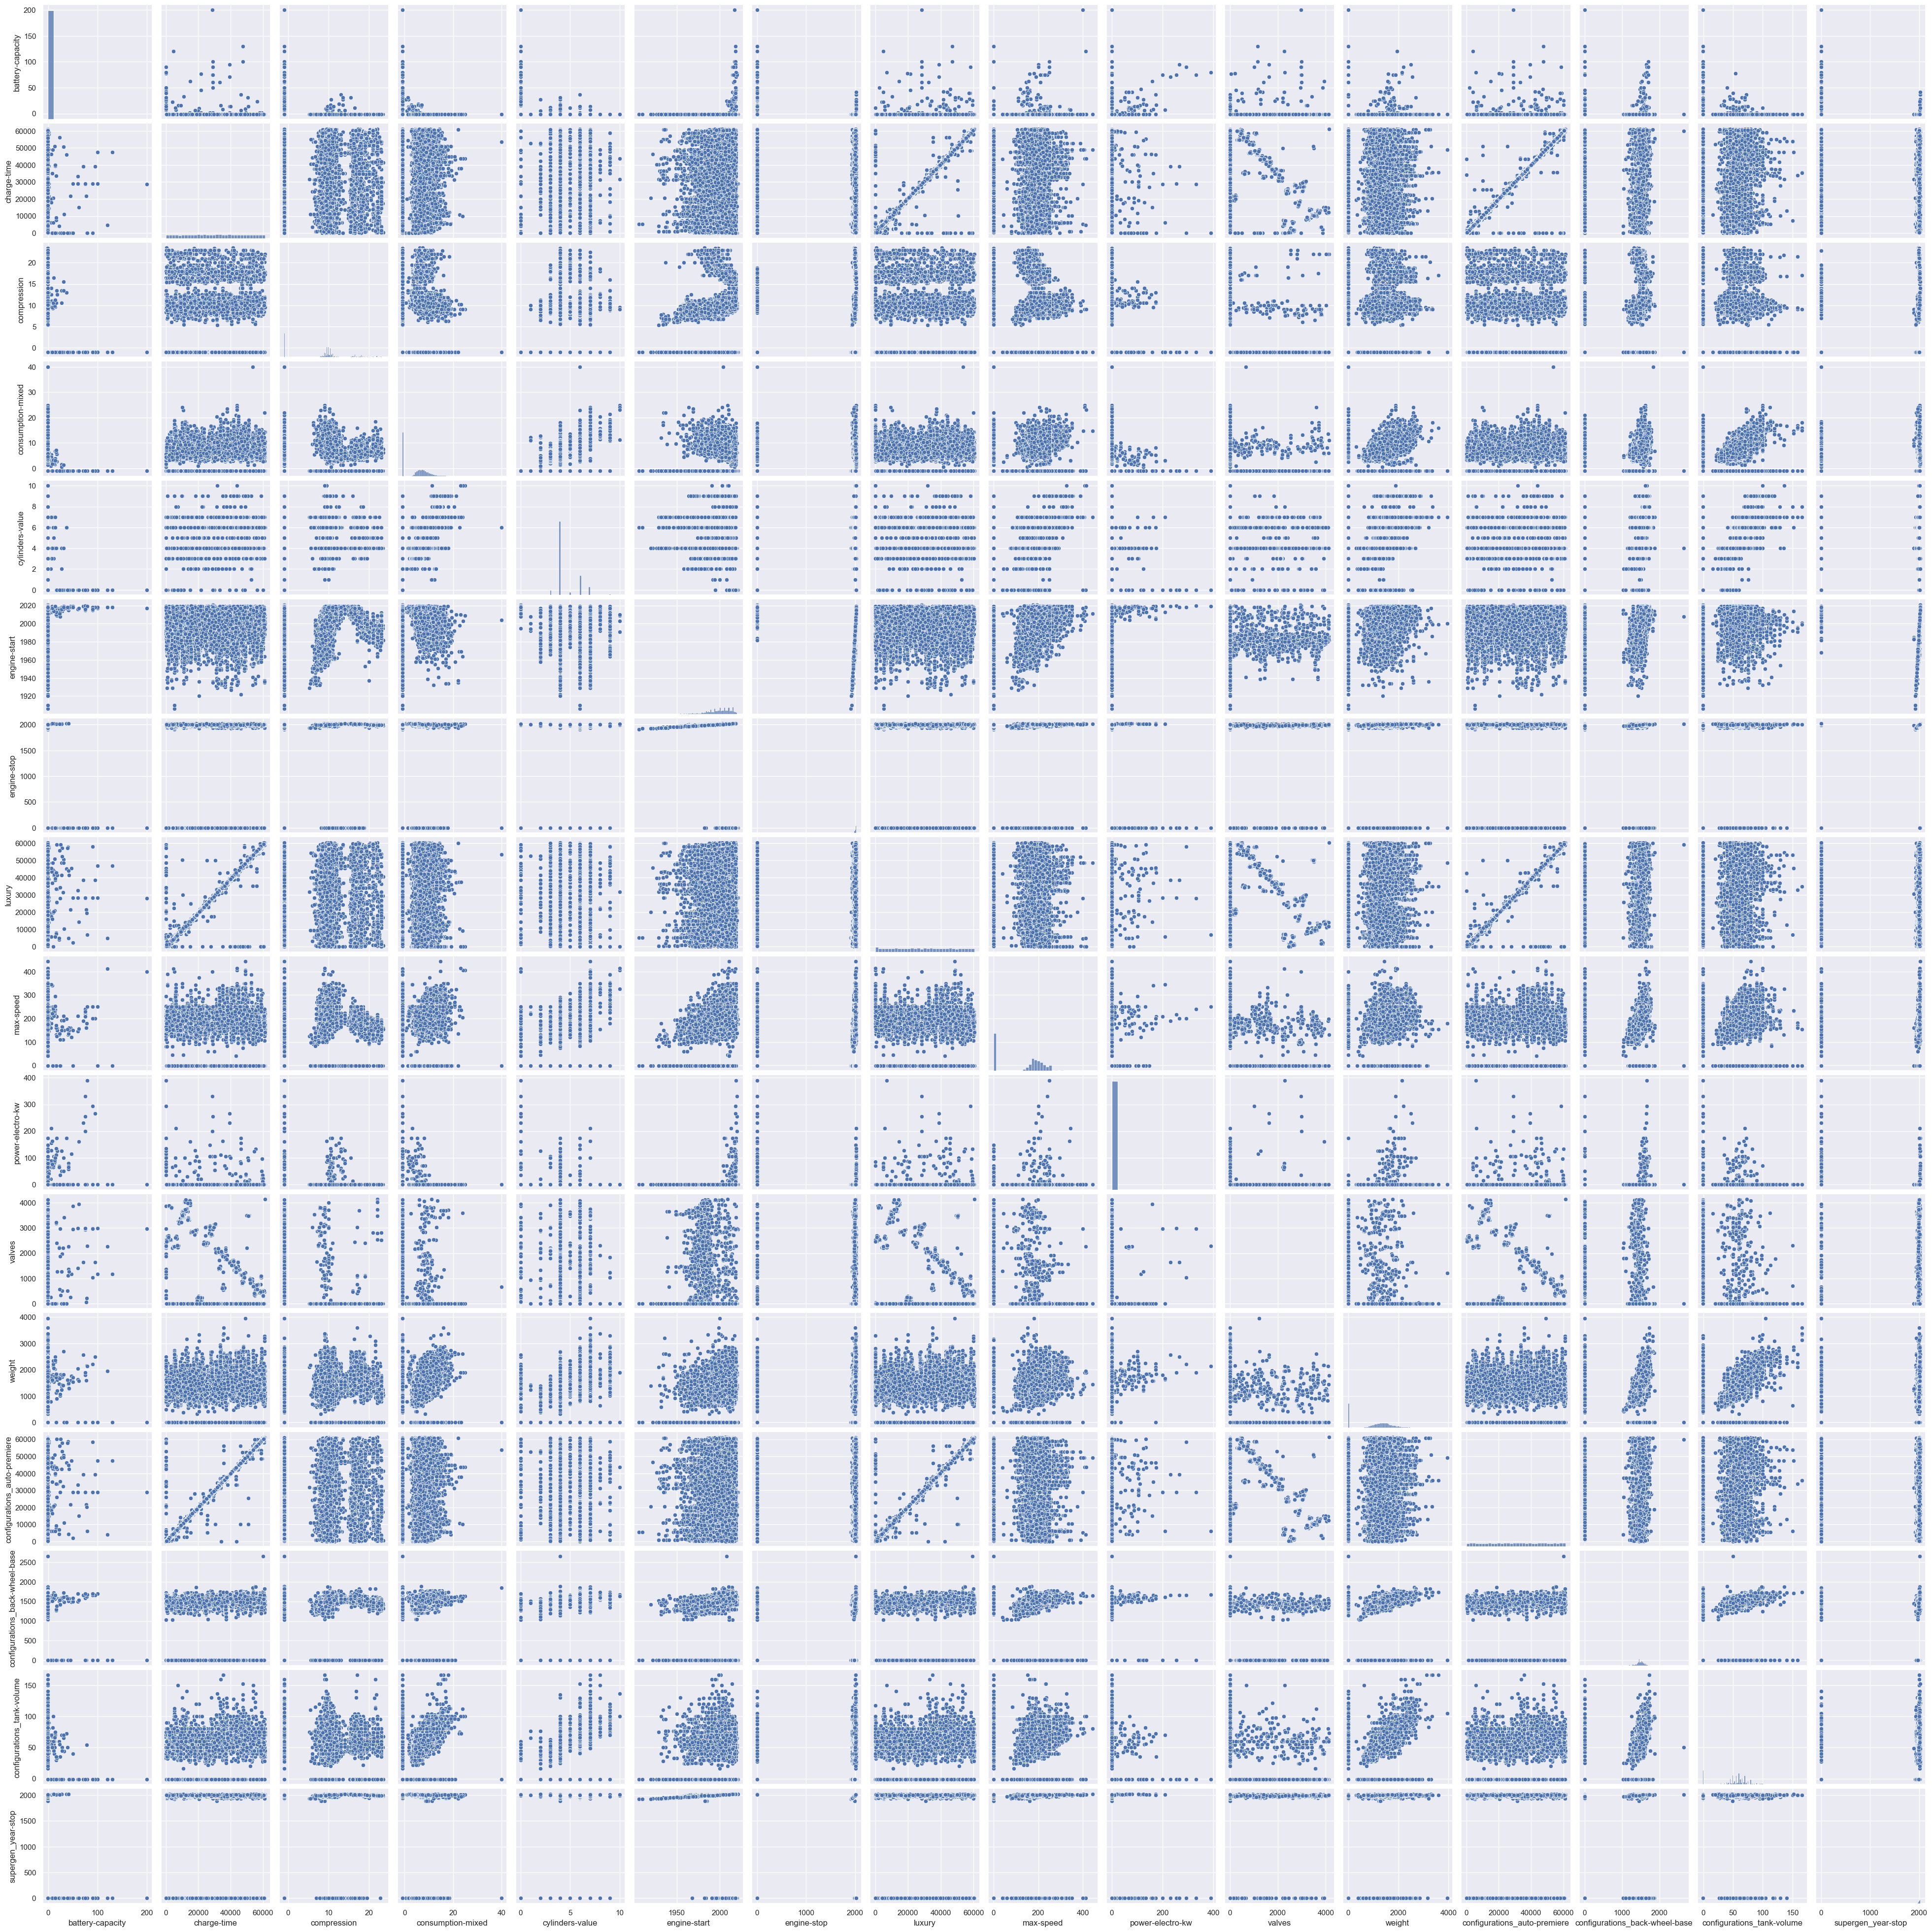

In [22]:
sns.pairplot(train_X[numerical]);

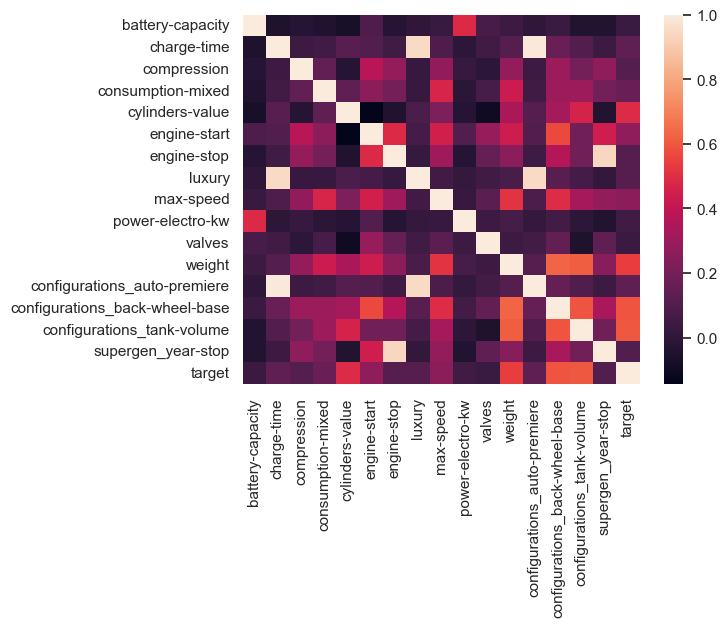

In [59]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [60]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.11003752360955586 p-value: 9.725646829179841e-79


In [61]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667099632 p-value: 5.6105473635809865e-05


## F-test

In [99]:
from sklearn.feature_selection import f_regression, SelectKBest

In [100]:
f_statistic, p_values = f_regression(train_X, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [101]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001])

In [102]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  2.0000e+03,
         1.6000e+01,  0.0000e+00],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  1.9960e+03,
         2.3000e+01,  0.0000e+00],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  2.0120e+03,
         1.0000e+01,  0.0000e+00],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ..., -1.0000e+00,
         2.6000e+01,  0.0000e+00],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.9950e+03,
         1.6000e+01,  0.0000e+00],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  2.0070e+03,
         3.5000e+01,  0.0000e+00]])

In [103]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'valves', 'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial'], dtype=object)

## Значения Шепли

In [24]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [104]:
import shap


In [105]:
reg = LinearRegression().fit(train_X, train_y)

In [106]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

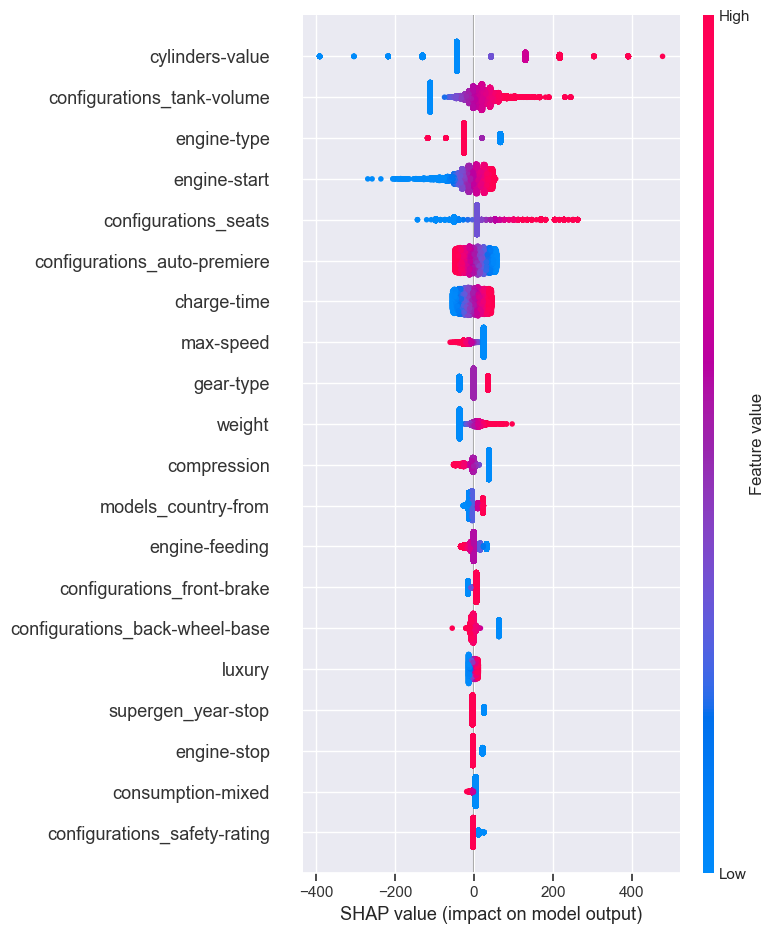

In [107]:
shap.summary_plot(shap_values, test_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [108]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

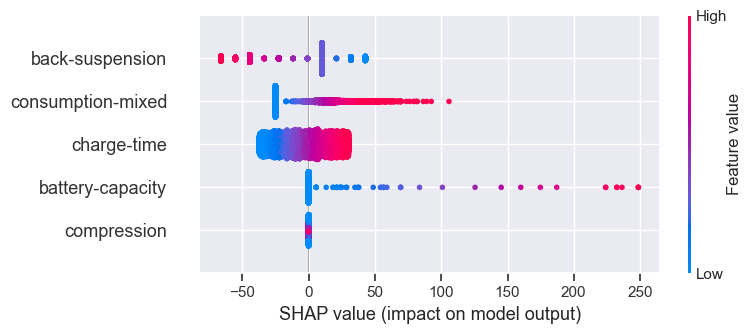

In [109]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [110]:
train_cut_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed'],
      dtype='object')

In [114]:
from itertools import chain, combinations
import math
from sklearn.metrics import r2_score

def powerset(iterable):
    s = list(iterable)
    return [list(i) for i in chain.from_iterable(combinations(s, r) for r in range(len(s)+1))]

In [117]:
features = list(train_cut_X.columns)

shap_v = {}

for i in features:
    features_without_i = features.copy()
    features_without_i.remove(i)
    
    S = powerset(features_without_i)
    summ = 0 
    
    for s in S:
        n = (np.math.factorial(len(s)) * np.math.factorial(len(features) - len(s)-1)) / (np.math.factorial(len(features)))
                                                                                
        fi = LinearRegression().fit(train_cut_X[s + [i]], train_y) #f(i) - обучение с i признаком
        Ri = r2_score(fi.predict(test_cut_X[s + [i]]), test_y)
        f_i = LinearRegression().fit(train_cut_X[s], train_y) #f(-i) - обучение без i признака
        R_i = r2_score(f_i.predict(test_cut_X[s]), test_y)
        
        summ += n * (Ri - R_i)
                                                                                         
    shap_v[i] = summ

ValueError: at least one array or dtype is required

In [116]:
shap_v

<module 'shap' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\shap\\__init__.py'>

Не знаю, чего он ругается

## Пермутационная важность

In [119]:
pip install eli5

     ------------------------------------ 216.2/216.2 kB 286.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 133.2/133.2 kB 133.4 kB/s eta 0:00:00
     -------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107728 sha256=88a70810e1e2e7b7d4fa33fe950822983497b8e31561e3c278af3653367b6741
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [120]:
import eli5
from eli5.sklearn import PermutationImportance

In [121]:
reg = LinearRegression().fit(train_X, train_y)

In [122]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [123]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [125]:
m = LinearRegression().fit(train_X, train_y)
perm = {}

for i in train_X.columns:
    test_sh_X = test_X.copy()
    test_sh_X[i] = np.random.permutation(test_X.loc[:, i].values)
    perm[i] = r2_score(m.predict(test_sh_X), test_y)


In [126]:
sorted(perm, key=lambda x: perm[x])

['cylinders-value',
 'configurations_tank-volume',
 'configurations_seats',
 'weight',
 'engine-start',
 'engine-type',
 'charge-time',
 'models_country-from',
 'configurations_front-brake',
 'supergen_year-stop',
 'models_light-and-commercial',
 'engine-stop',
 'gear-type',
 'luxury',
 'battery-capacity',
 'valvetrain',
 'power-electro-kw',
 'configurations_safety-rating',
 'supply-system',
 'models_group',
 'back-suspension',
 'models_male',
 'engine-feeding',
 'consumption-mixed',
 'valves',
 'compression',
 'cylinders-order',
 'configurations_back-wheel-base',
 'max-speed',
 'configurations_auto-premiere']

# Домашнее задание

Сгенерировать полиномиальные признаки для рассматриваегомого сегодня набора данных. Попробовать отобрать признаки различными методами (можно теми, что не рассматривали). Получить максимальное качество на тестовых данных. Проинтерпретировать результаты.

In [127]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import eli5
from eli5.sklearn import PermutationImportance

In [128]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats'] #порядковые
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

In [129]:
X = df[numerical]
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [130]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)

In [131]:
test_X_st = scaler.transform(test_X)

In [132]:
model_1 = LinearRegression()

model_1.fit(train_X_st, train_y)
print(model_1.coef_, model_1.intercept_)
predictions = model_1.predict(test_X_st)

[[ 17.89297944  41.21927563  -8.46023228 -11.83816481  96.02208438
   30.83773258 -13.33844599   9.96209132 -24.10284577   1.14978477
    9.10060455  37.82946685 -45.53228769 -26.22503749  65.02695052
  -10.95031635]] [2659.80976047]


In [133]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(test_y, predictions)
rmse = mean_squared_error(test_y, predictions, squared=False)
mape = mean_absolute_percentage_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2)


Среднеквадратическая ошибка (MSE): 35620.30348232317
Среднеквадратическая ошибка (RMSE): 188.73341909244152
Средняя абсолютная ошибка  (MAPE): 4.92 %
Коэффициент детерминации (R^2): 0.3852478516923403


In [134]:
perm = PermutationImportance(model_1, random_state=42).fit(train_X_st, train_y)

In [135]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

In [136]:
df['compression'] = df['compression'].replace(-1, df['compression'].median())
df['battery-capacity'] = df['battery-capacity'].replace(-1, df['battery-capacity'].median())

In [137]:
# Создаем экземпляр класса PolynomialFeatures для создания полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)

# Преобразуем исходные признаки в полиномиальные признаки
poly_features = poly.fit_transform(X)

# Создаем новый датафрейм с полиномиальными признаками
poly_column_names = poly.get_feature_names(X.columns)
df_poly = pd.DataFrame(poly_features, columns=poly_column_names)

# Объединяем исходный датафрейм и датафрейм с полиномиальными признаками
df_combined = pd.concat([X, df_poly], axis=1)

# Выводим итоговый датафрейм с полиномиальными признаками
df_combined

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


battery-capacity  charge-time  compression  consumption-mixed  \
0                  -1.0        36457          9.0                4.3   
1                  -1.0        44872          8.0               -1.0   
2                  -1.0        55927         16.0                4.2   
3                  -1.0        41405         10.3               -1.0   
4                  -1.0        22523         19.0               -1.0   
...                 ...          ...          ...                ...   
43240              -1.0        34558         11.2                6.6   
43241              -1.0        38268          9.6                5.8   
43242              -1.0         8958         10.0                9.3   
43243              -1.0        20293          8.5               -1.0   
43244              -1.0        52459          8.6               -1.0   

       cylinders-value  engine-start  engine-stop  luxury  max-speed  \
0                    3          2006         2018   36646       -1.0   
1                    7          1982         1993   44289      217.0   
2                    4          2014         2018   55481      193.0   
3                    4          2000         2003   40914      189.0   
4                    4          2000         2005   22118      185.0   
...                ...           ...          ...     ...        ...   
43240                4          2004         2016   34747      175.0   
43241                4          2013         2015   37929      242.0   
43242                4          1991         1999    8324      170.0   
43243                5          2002         2004   19806      250.0   
43244                4          1982         1984   51505       -1.0   

       power-electro-kw  ...  configurations_auto-premiere^2  \
0                  -1.0  ...                    1.330717e+09   
1                  -1.0  ...                    2.015561e+09   
2                  -1.0  ...                    3.131857e+09   
3                  -1.0  ...                    1.716031e+09   
4                  -1.0  ...                    5.058451e+08   
...                 ...  ...                             ...   
43240              -1.0  ...                    1.195085e+09   
43241              -1.0  ...                    1.465818e+09   
43242              -1.0  ...                    7.926341e+07   
43243              -1.0  ...                    4.105892e+08   
43244              -1.0  ...                    2.756355e+09   

       configurations_auto-premiere configurations_back-wheel-base  \
0                                             47422700.0             
1                                             69811725.0             
2                                             85847242.0             
3                                             61930375.0             
4                                             34073865.0             
...                                                  ...             
43240                                         49262250.0             
43241                                         59381586.0             
43242                                         12998380.0             
43243                                         31367124.0             
43244                                         74288915.0             

       configurations_auto-premiere configurations_tank-volume  \
0                                              1459160.0         
1                                              4848660.0         
2                                              3077965.0         
3                                              2278375.0         
4                                              1394442.0         
...                                                  ...         
43240                                          1624790.0         
43241                                          2488590.0         
43242                                           489665.0         
43243  

In [138]:
df_combined = df_combined.T.drop_duplicates().T
df_combined

battery-capacity  charge-time  compression  consumption-mixed  \
0                  -1.0      36457.0          9.0                4.3   
1                  -1.0      44872.0          8.0               -1.0   
2                  -1.0      55927.0         16.0                4.2   
3                  -1.0      41405.0         10.3               -1.0   
4                  -1.0      22523.0         19.0               -1.0   
...                 ...          ...          ...                ...   
43240              -1.0      34558.0         11.2                6.6   
43241              -1.0      38268.0          9.6                5.8   
43242              -1.0       8958.0         10.0                9.3   
43243              -1.0      20293.0          8.5               -1.0   
43244              -1.0      52459.0          8.6               -1.0   

       cylinders-value  engine-start  engine-stop   luxury  max-speed  \
0                  3.0        2006.0       2018.0  36646.0       -1.0   
1                  7.0        1982.0       1993.0  44289.0      217.0   
2                  4.0        2014.0       2018.0  55481.0      193.0   
3                  4.0        2000.0       2003.0  40914.0      189.0   
4                  4.0        2000.0       2005.0  22118.0      185.0   
...                ...           ...          ...      ...        ...   
43240              4.0        2004.0       2016.0  34747.0      175.0   
43241              4.0        2013.0       2015.0  37929.0      242.0   
43242              4.0        1991.0       1999.0   8324.0      170.0   
43243              5.0        2002.0       2004.0  19806.0      250.0   
43244              4.0        1982.0       1984.0  51505.0       -1.0   

       power-electro-kw  ...  configurations_auto-premiere^2  \
0                  -1.0  ...                    1.330717e+09   
1                  -1.0  ...                    2.015561e+09   
2                  -1.0  ...                    3.131857e+09   
3                  -1.0  ...                    1.716031e+09   
4                  -1.0  ...                    5.058451e+08   
...                 ...  ...                             ...   
43240              -1.0  ...                    1.195085e+09   
43241              -1.0  ...                    1.465818e+09   
43242              -1.0  ...                    7.926341e+07   
43243              -1.0  ...                    4.105892e+08   
43244              -1.0  ...                    2.756355e+09   

       configurations_auto-premiere configurations_back-wheel-base  \
0                                             47422700.0             
1                                             69811725.0             
2                                             85847242.0             
3                                             61930375.0             
4                                             34073865.0             
...                                                  ...             
43240                                         49262250.0             
43241                                         59381586.0             
43242                                         12998380.0             
43243                                         31367124.0             
43244                                         74288915.0             

       configurations_auto-premiere configurations_tank-volume  \
0                                              1459160.0         
1                                              4848660.0         
2                                              3077965.0         
3                                              2278375.0         
4                                              1394442.0         
...                                                  ...         
43240                                          1624790.0         
43241                                          2488590.0         
43242                                           489665.0     

In [139]:
X = df_combined
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)

In [141]:
test_X_st = scaler.transform(test_X)

In [142]:
model_1 = Lasso()

model_1.fit(train_X_st, train_y)
print(model_1.coef_, model_1.intercept_)
predictions = model_1.predict(test_X_st)

[ 0.00000000e+00 -0.00000000e+00 -2.44011124e+00  0.00000000e+00
  1.30725403e+02  0.00000000e+00 -6.17504622e+00 -9.28777625e-01
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -3.30655195e+00 -2.39825774e+02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  2.40225164e+00  0.00000000e+00 -5.14812333e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  4.88637822e+00
 -0.00000000e+00 -0.00000000e+00  2.43417067e+00 -1.67436340e+00
  0.00000000e+00 -0.00000000e+00 -2.00404398e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.47282727e+01  3.95175233e+00
 -7.96452537e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  6.70987981e+00
 -0.00000000e+00 -3.56249539e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.04368112e+01  0.00000000e+00 -2.06105218e-01
 -1.72879548e+01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.62469

In [143]:

from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(test_y, predictions)
rmse = mean_squared_error(test_y, predictions, squared=False)
mape = mean_absolute_percentage_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 24109.91764118227
Среднеквадратическая ошибка (RMSE): 155.2736862484506
Средняя абсолютная ошибка  (MAPE): 3.72 %
Коэффициент детерминации (R^2): 0.5838995680429034


In [144]:
perm = PermutationImportance(model_1, random_state=42).fit(train_X_st, train_y)

In [145]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

In [146]:
X = df_combined[['configurations_back-wheel-base^2', 'weight^2', 'cylinders-value', 'configurations_tank-volume^2', 'cylinders-value weight', 'cylinders-value max-speed', 'consumption-mixed^2', 'charge-time luxury', 'engine-stop max-speed', 'compression max-speed']]
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [148]:
model_1 = Lasso()

model_1.fit(train_X_st, train_y)
print(model_1.coef_, model_1.intercept_)
predictions = model_1.predict(test_X_st)

[   0.          244.44681203  116.77378618   57.31092853 -213.06117541
   -7.68172683   -8.93217482   10.52640737   -7.50691163    2.8040819 ] [2659.80976047]


In [149]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(test_y, predictions)
rmse = mean_squared_error(test_y, predictions, squared=False)
mape = mean_absolute_percentage_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 29070.550585864075
Среднеквадратическая ошибка (RMSE): 170.50088148119374
Средняя абсолютная ошибка  (MAPE): 4.2 %
Коэффициент детерминации (R^2): 0.49828660404268776
